In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

# Veri Okuma

In [71]:
# verideki değerler "," karakteriyle değil de "\t" yani "tab" karakteri ile ayrıldığı için 
# "sep" yani "ayırıcı" parametresine "\t" değerini vererek veriyi okuyoruz
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/customer_data.csv", sep="\t")

In [72]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,43,118,46,27,15,5,5,3,6,5


## Veriyi İnceleme

In [48]:
# satır ve sütun sayısı
df.shape

(2240, 19)

In [49]:
# Boş (Null) değerler var mı?
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

# Veri Ön İşleme ve Temizleme

## NaN verileri doldurma

"Income" sütununda yani "Toplam Gelir" kısmında bazı satırlarda değer yok (Null). <br>
Gelir miktarı sayısal bir değer yani bu boş yerleri diğer gelir miktarlarının ortalaması veya medyanı ile doldurabiliriz. <br>
Boş satır sayısı az olduğu için o satırları direkt silebiliriz de. Ama veri kaybetmemek için boş yerleri dolduralım. <br>

In [50]:
# medyan ile dolduralım
medyan = df["Income"].median()
df["Income"] = df["Income"].fillna(medyan)

In [51]:
# verideki toplam null değer sayısına bakalım
df.isnull().sum().sum()

0

In [52]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,43,118,46,27,15,5,5,3,6,5


## Zaman verisini datetime'a çevirme

In [53]:
df["Dt_Customer"].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [54]:
# direkt pd.to_datetime kullanırsak yanlış sonuçlar elde ediyoruz
# örneğin çevirdikten sonra tarihlerin aylarına bakalım
pd.to_datetime(df["Dt_Customer"]).dt.month.head()

0     4
1     8
2     8
3    10
4     1
Name: Dt_Customer, dtype: int64

Verimizde tarihler gün-ay-yıl şeklinde dizilmiş. Ancak pandas bu tarihleri ay-gün-yıl şeklinde okur. <br>
Yukarıda gördüğümüz gibi ilk tarihteki ay değeri 4 yani 4. ay ancak aslında 9. ay olması lazım. <br>
pd.to_datetime metodunun format parametresini değiştirerek bu sorunu çözebiliriz. <br>

In [55]:
# format parametresini "gün-ay-yıl" olarak okuyacak şekilde değiştirelim
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [56]:
df["Dt_Customer"].dt.month.head()

0    9
1    3
2    8
3    2
4    1
Name: Dt_Customer, dtype: int64

In [57]:
# verinin toplandığı tarihi veriden tahmini olarak çıkaralım
max([i + datetime.timedelta(days=int(j)) for i, j in zip(df["Dt_Customer"], df["Recency"])])

Timestamp('2014-10-04 00:00:00')

In [58]:
# verinin toplandığı tarihi "today" değişkenine atayalım
today = pd.to_datetime("10-04-2014")
print(f"Satış yapılan en son tarih: {today}")

Satış yapılan en son tarih: 2014-10-04 00:00:00


# Müşteri Analizi Soruları

In [59]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,43,118,46,27,15,5,5,3,6,5


## Müşterilerin toplam harcamaları ile kaç gündür müşteri oldukları arasında nasıl bir ilişki var?

In [60]:
# toplam harcamaları bulalım
df["TotalAmount"] = df.loc[:, "MntFruits":"MntGoldProds"].sum(axis=1)

# toplam harcamaları yazdıralım
df["TotalAmount"].head()

0    982
1     16
2    350
3     42
4    249
Name: TotalAmount, dtype: int64

In [61]:
# müşterilerin kaç gündür müşteri olduğunu bulalım
# müşteri olarak geçirilen gün sayısı = verinin toplandığı tarih - müşterinin müşteri olduğu tarih
df["TotalDays"] = (today - df["Dt_Customer"]).dt.days

# müşteri olarak geçirilen ay saysını da bulalım
df["TotalMonths"] = df["TotalDays"] // 30

# gün sayılarını yazdıralım
df["TotalDays"].head()

0    760
1    210
2    409
3    236
4    258
Name: TotalDays, dtype: int64

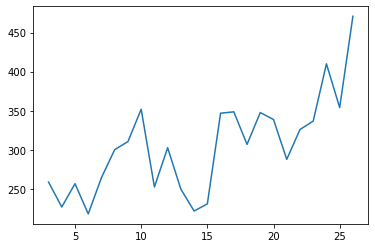

In [62]:
# ay sayısı ve harcanan miktarları görselleştirelim
days_amounts = df.groupby("TotalMonths")["TotalAmount"].mean()

plt.figure()
plt.plot(days_amounts.index, days_amounts.values)
plt.show()

Görüldüğü gibi müşterinin müşteri olarak geçirdiği ay sayısı arttıkça harcadığı para miktarı artıyor.

## Evdeki çocuk ve genç sayısı ile harcanan para miktarı arasındaki ilişki nedir?

In [63]:
# evdeki çocuk ve genç sayısını bulalım
df["KidTeenhome"] = df["Kidhome"] + df["Teenhome"]

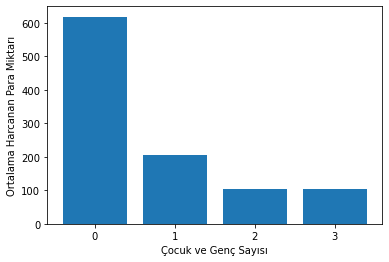

In [64]:
# çocuk sayısı ile harcanan para arasındaki ilişkiye bakalım
kids_and_amounts = df.groupby("KidTeenhome")["TotalAmount"].mean()

plt.figure()
plt.bar(kids_and_amounts.index.astype(str), kids_and_amounts.values)
plt.xlabel("Çocuk ve Genç Sayısı")
plt.ylabel("Ortalama Harcanan Para Miktarı")
plt.show()

Çocuk sayısı arttıkça harcanan miktar azalıyor gibi! Nasıl oluyor bu? <br>
Hiç çocuğu olmayan kişiler neden bu kadar çok para harcıyor?

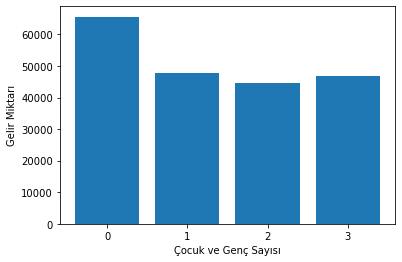

In [65]:
# çocuk sayısı ile gelir miktarı arasındaki ilişkiye bakalım
kids_and_incomes = df.groupby("KidTeenhome")["Income"].mean()

plt.figure()
plt.bar(kids_and_incomes.index.astype(str), kids_and_incomes.values)
plt.xlabel("Çocuk ve Genç Sayısı")
plt.ylabel("Gelir Miktarı")
plt.show()

Hiç çocuğu olmayan kişilerin gelir miktarı daha fazla. <br>
Gelirleri daha fazla olduğu için daha çok harcama yapıyor olabilirler.

## Eğitim seviyeleri ile gelir miktarları arasındaki ilişki nedir?

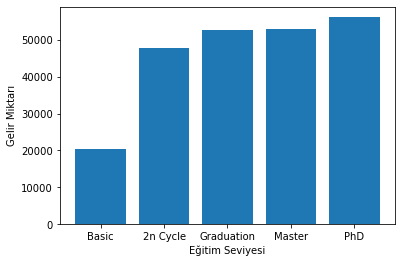

In [66]:
# her eğitim seviyesi için gelir miktarlarını hesaplayalım
education_incomes = df.groupby("Education").mean()["Income"].sort_values()

# görselleştirelim
plt.figure()
plt.bar(education_incomes.index, education_incomes.values)
plt.xlabel("Eğitim Seviyesi")
plt.ylabel("Gelir Miktarı")
plt.show()

Eğitim seviyesi arttıkça gelir miktarı artıyor.